In [1]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Set Seaborn style
sns.set_style("darkgrid")

# Import TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model

# Prevent annoying TensorFlow warnings
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# Ignore warnings
import warnings
warnings.simplefilter("ignore")


In [2]:
sdir = r"C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\Processed Images_Fruits"
bad_path = r"C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\Processed Images_Fruits\\Bad Quality_Fruits"
good_path = r"C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\Processed Images_Fruits\\Good Quality_Fruits"
mixed_path = r"C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\Processed Images_Fruits\\Mixed Qualit_Fruits"

filepaths = []
labels = []
ht = 0
wt = 0
samples = 0
sample_count = 20
for quality in [bad_path, good_path, mixed_path]:
    fruit_list = os.listdir(quality)
    for fruit in fruit_list:
        fruit_path = os.path.join(quality, fruit)
        img_list = os.listdir(fruit_path)
        for i, img in enumerate(img_list):
            img_path = os.path.join(fruit_path, img)
            if i < sample_count:
                img = plt.imread(img_path)
                ht += img.shape[0]
                wt += img.shape[1]
                samples += 1
            filepaths.append(img_path)
            if quality == mixed_path:
                labels.append(fruit + "_mixed")
            else:
                labels.append(fruit)
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
df = pd.concat([Fseries, Lseries], axis=1)
df 


filepaths             labels
0      C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Apple_Bad
1      C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Apple_Bad
2      C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Apple_Bad
3      C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Apple_Bad
4      C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Apple_Bad
...                                                  ...                ...
19521  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_mixed
19522  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_mixed
19523  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_mixed
19524  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_mixed
19525  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_mixed

[19526 rows x 2 columns]

In [3]:
df['labels']=df['labels'].astype('category')

In [4]:
df['labels'].value_counts()

labels
Pomegranate_Good     5940
Orange_Good          1216
Pomegranate_Bad      1187
Orange_Bad           1159
Guava_Good           1152
Apple_Good           1149
Apple_Bad            1141
Guava_Bad            1129
Banana_Good          1113
Lime_Good            1094
Banana_Bad           1087
Lime_Bad             1085
Banana_mixed          285
Lemon_mixed           278
Guava_mixed           148
Orange_mixed          125
Pomegranate_mixed     125
Apple_mixed           113
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df['labels'].unique()

['Apple_Bad', 'Banana_Bad', 'Guava_Bad', 'Lime_Bad', 'Orange_Bad', ..., 'Banana_mixed', 'Guava_mixed', 'Lemon_mixed', 'Orange_mixed', 'Pomegranate_mixed']
Length: 18
Categories (18, object): ['Apple_Bad', 'Apple_Good', 'Apple_mixed', 'Banana_Bad', ..., 'Orange_mixed', 'Pomegranate_Bad', 'Pomegranate_Good', 'Pomegranate_mixed']

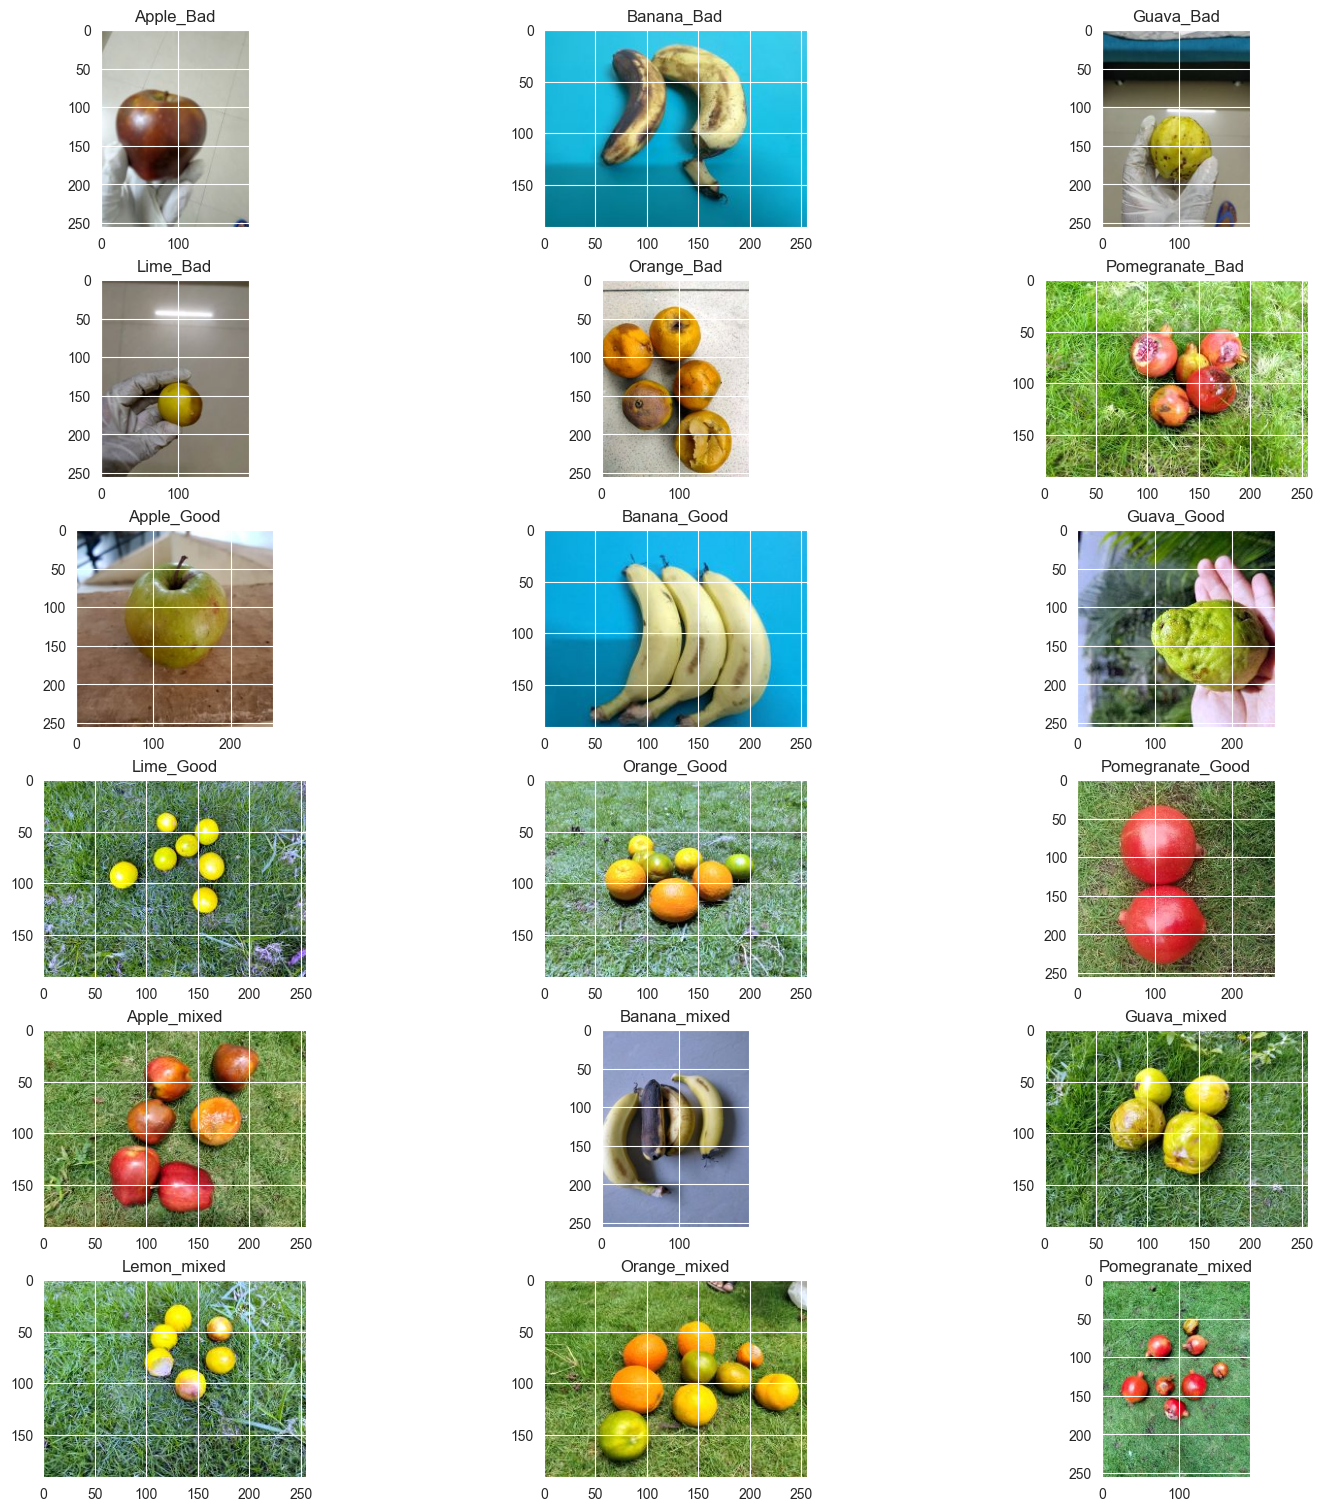

In [6]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['labels'].unique():
    
    ax[j].imshow(plt.imread(df[df['labels']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=123)

In [8]:
print(X_train.shape)
print(X_test.shape)

(15620, 2)
(3906, 2)


In [9]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                              validation_split=0.2)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, 
                                           x_col='filepaths', 
                                           y_col='labels',
                                           class_mode='categorical', 
                                           subset='training', 
                                           batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, 
                                         x_col='filepaths', 
                                         y_col='labels',
                                         class_mode='categorical', 
                                         subset='validation',
                                         batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, 
                                        x_col='filepaths', 
                                        y_col='labels',
                                        class_mode='categorical', 
                                        batch_size=32, 
                                        shuffle=False)

Found 12496 validated image filenames belonging to 18 classes.
Found 3124 validated image filenames belonging to 18 classes.
Found 3906 validated image filenames belonging to 18 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


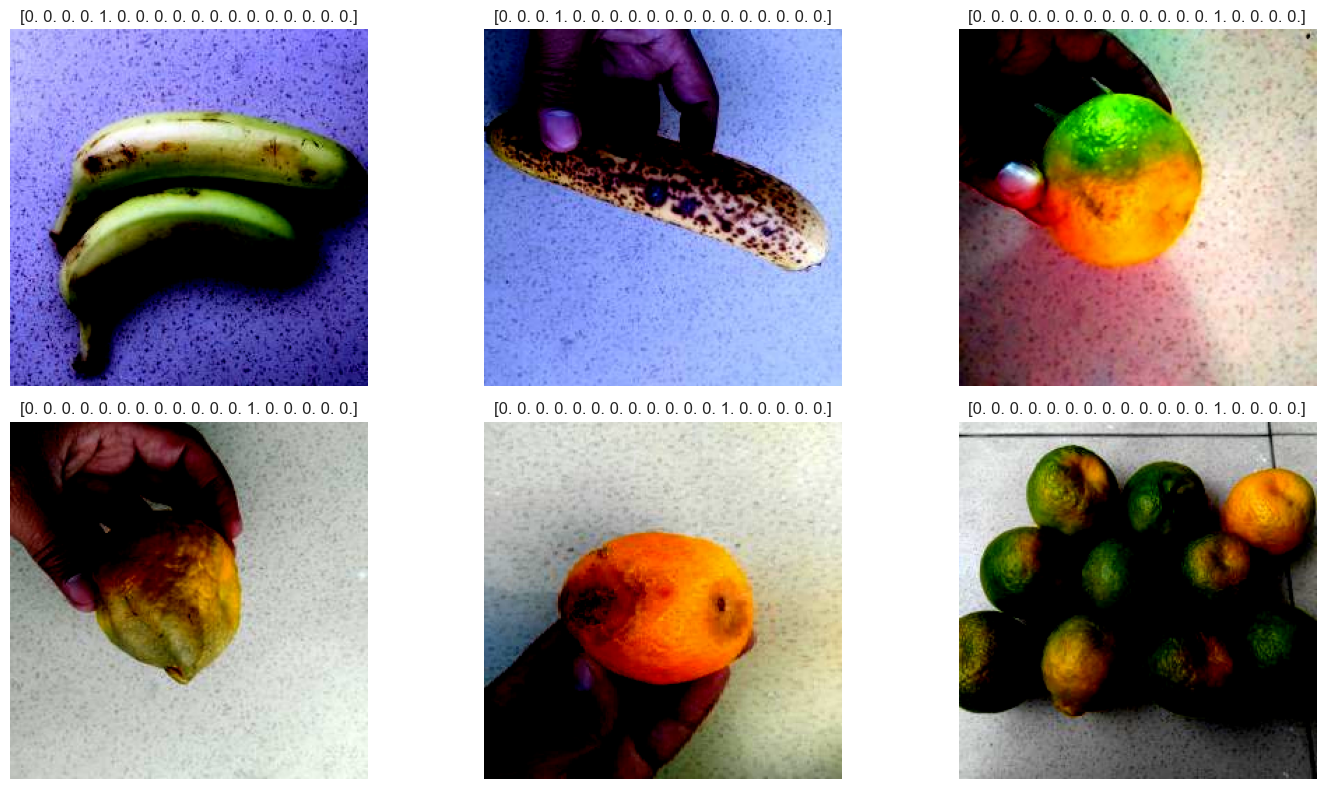

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()  # Flatten the array of axes for easy indexing

# Loop to display 6 images
for j in range(6):
    img, label = next(X_test_img)  # Use next to get the next batch
    ax[j].imshow(img[0])  # Display the first image from the batch
    ax[j].set_title(label[0])  # Set the title to the first label
    ax[j].axis('off')  # Optionally, turn off the axis for better visualization

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Show the plot

In [12]:
X_test_img[0][0].shape

(32, 256, 256, 3)

In [13]:
image_shape=(256,256,3)

In [14]:
X_train_img.class_indices

{'Apple_Bad': 0,
 'Apple_Good': 1,
 'Apple_mixed': 2,
 'Banana_Bad': 3,
 'Banana_Good': 4,
 'Banana_mixed': 5,
 'Guava_Bad': 6,
 'Guava_Good': 7,
 'Guava_mixed': 8,
 'Lemon_mixed': 9,
 'Lime_Bad': 10,
 'Lime_Good': 11,
 'Orange_Bad': 12,
 'Orange_Good': 13,
 'Orange_mixed': 14,
 'Pomegranate_Bad': 15,
 'Pomegranate_Good': 16,
 'Pomegranate_mixed': 17}

In [15]:
X_val_img.class_indices

{'Apple_Bad': 0,
 'Apple_Good': 1,
 'Apple_mixed': 2,
 'Banana_Bad': 3,
 'Banana_Good': 4,
 'Banana_mixed': 5,
 'Guava_Bad': 6,
 'Guava_Good': 7,
 'Guava_mixed': 8,
 'Lemon_mixed': 9,
 'Lime_Bad': 10,
 'Lime_Good': 11,
 'Orange_Bad': 12,
 'Orange_Good': 13,
 'Orange_mixed': 14,
 'Pomegranate_Bad': 15,
 'Pomegranate_Good': 16,
 'Pomegranate_mixed': 17}

In [16]:
X_test_img.class_indices

{'Apple_Bad': 0,
 'Apple_Good': 1,
 'Apple_mixed': 2,
 'Banana_Bad': 3,
 'Banana_Good': 4,
 'Banana_mixed': 5,
 'Guava_Bad': 6,
 'Guava_Good': 7,
 'Guava_mixed': 8,
 'Lemon_mixed': 9,
 'Lime_Bad': 10,
 'Lime_Good': 11,
 'Orange_Bad': 12,
 'Orange_Good': 13,
 'Orange_mixed': 14,
 'Pomegranate_Bad': 15,
 'Pomegranate_Good': 16,
 'Pomegranate_mixed': 17}

In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
#Membuat base model dari pre-trained model dengan Inception ResNetV2
pre_trained= InceptionResNetV2(include_top=False, 
                               input_shape=image_shape)

#Freeze the convolutional base
pre_trained.trainable=False

inputs = pre_trained.input

x = data_augmentation(inputs)
x = pre_trained(x, training=False)
x = GlobalAveragePooling2D()(x)
x=Dense(256, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128, activation='relu')(x)
output=Dense(18, activation='softmax')(x)
model = Model(inputs=inputs, outputs=output)


#Compile the model
base_learning_rate = 0.0001
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 568s 3us/step


In [20]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_resnet_v2             │ (None, 6, 6, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,765,426 (208.91 MB)

 Trainable params: 428,690 (1.64 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

initial_epoch = 10
results = model.fit(X_train_img,epochs= initial_epoch,
                              validation_data=X_val_img,
                                callbacks=[early_stop]) 

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3534s 9s/step - accuracy: 0.5559 - loss: 1.5963 - val_accuracy: 0.8576 - val_loss: 0.4934
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3507s 9s/step - accuracy: 0.8447 - loss: 0.5189 - val_accuracy: 0.8937 - val_loss: 0.3457
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28234s 72s/step - accuracy: 0.8856 - loss: 0.3803 - val_accuracy: 0.9104 - val_loss: 0.2697
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3299s 8s/step - accuracy: 0.9038 - loss: 0.3117 - val_accuracy: 0.9241 - val_loss: 0.2320
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3785s 10s/step - accuracy: 0.9207 - loss: 0.2523 - val_accuracy: 0.9398 - val_loss: 0.1912
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5106s 13s/step - accuracy: 0.9351 - loss: 0.2115 - val_accuracy: 0.9414 - val_loss: 0.1797
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3853s 10s/step - accuracy: 0.9431 - loss: 0.1933 - val_accuracy: 0.9449 - val_loss: 0.1638
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6667s 17s/step - accuracy: 0.9464 - loss: 0.1

Text(0.5, 1.0, 'Loss')

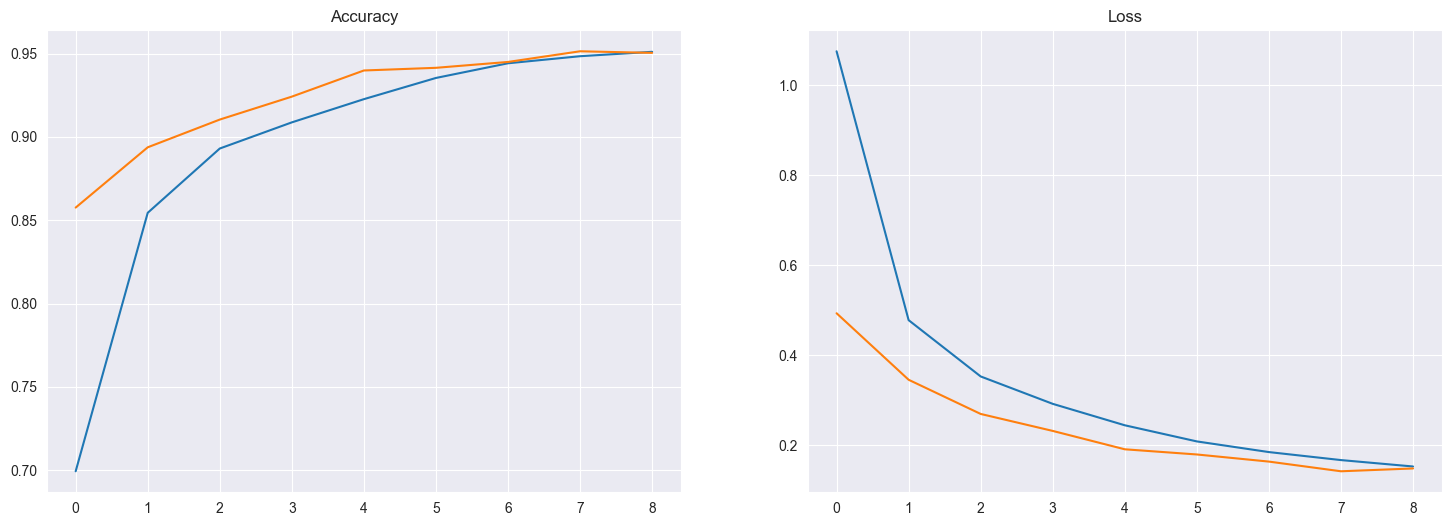

In [22]:
result_df = pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result_df[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result_df[['loss','val_loss']])
ax[1].set_title("Loss")

In [23]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

123/123 ━━━━━━━━━━━━━━━━━━━━ 832s 7s/step


In [24]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9521249359959038


<Axes: >

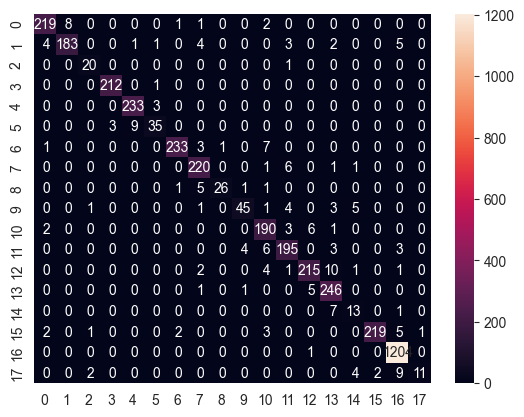

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['labels'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['labels'],pred_df['pred']), annot=True, fmt='2d')

                                               filepaths            labels  \
8323   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...       Banana_Good   
4204   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Lime_Bad   
16867  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
4413   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Lime_Bad   
12590  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
14868  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   

                   pred  
8323        Banana_Good  
4204           Lime_Bad  
16867  Pomegranate_Good  
4413           Lime_Bad  
12590  Pomegranate_Good  
14868  Pomegranate_Good  


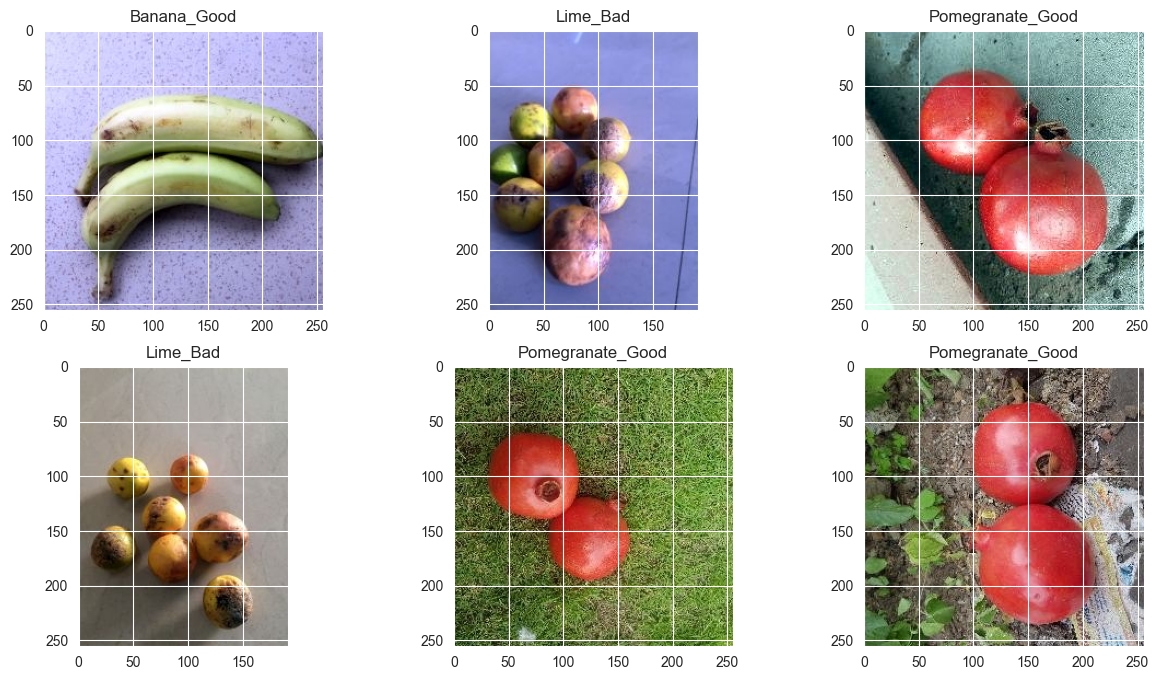

In [26]:
print(pred_df[pred_df['labels']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['labels']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['filepaths'][i]))
    ax[i].set_title(imlist['labels'][i])

In [27]:
pre_trained.trainable = True

In [28]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(pre_trained.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in pre_trained.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  780


In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_resnet_v2             │ (None, 6, 6, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,765,426 (208.91 MB)

 Trainable params: 53,937,314 (205.75 MB)

 Non-trainable params: 828,112 (3.16 MB)

In [31]:
len(model.trainable_variables)

430

In [32]:
fine_tune_epochs = 10
total_epochs =  initial_epoch + fine_tune_epochs

history_fine = model.fit(X_train_img,
                         epochs=total_epochs,
                         initial_epoch=10,
                         validation_data=X_val_img)

Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9321s 24s/step - accuracy: 0.8664 - loss: 0.4404 - val_accuracy: 0.9702 - val_loss: 0.1075
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9149s 23s/step - accuracy: 0.9712 - loss: 0.1004 - val_accuracy: 0.9792 - val_loss: 0.0712
Epoch 13/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10580s 27s/step - accuracy: 0.9844 - loss: 0.0506 - val_accuracy: 0.9853 - val_loss: 0.0598
Epoch 14/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20233s 52s/step - accuracy: 0.9910 - loss: 0.0344 - val_accuracy: 0.9882 - val_loss: 0.0577
Epoch 15/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 10380s 27s/step - accuracy: 0.9933 - loss: 0.0231 - val_accuracy: 0.9904 - val_loss: 0.0546
Epoch 16/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8432s 22s/step - accuracy: 0.9948 - loss: 0.0188 - val_accuracy: 0.9910 - val_loss: 0.0452
Epoch 17/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8551s 22s/step - accuracy: 0.9963 - loss: 0.0142 - val_accuracy: 0.9920 - val_loss: 0.0486
Epoch 18/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9514s 24s/step - accuracy: 0.996

In [33]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

In [34]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

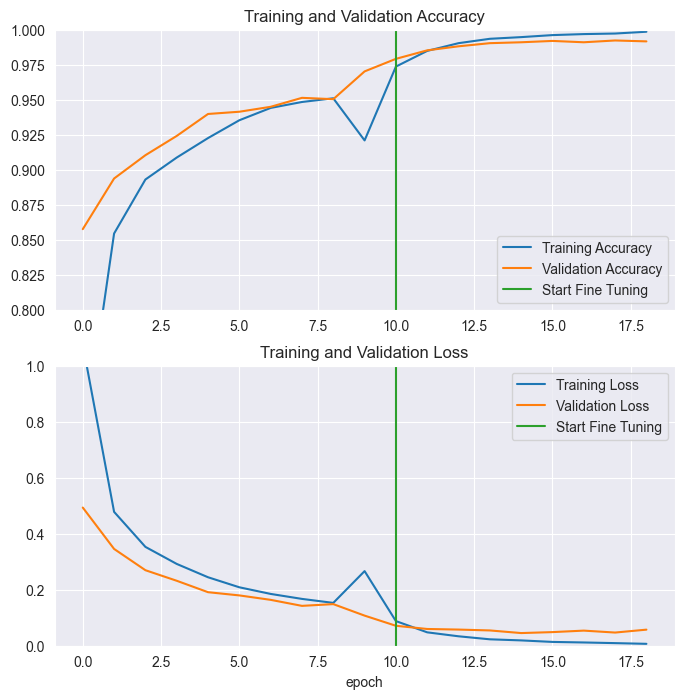

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([10,10],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10,10],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [36]:
loss, accuracy = model.evaluate(X_test_img)
print('Test accuracy :', accuracy)

123/123 ━━━━━━━━━━━━━━━━━━━━ 828s 7s/step - accuracy: 0.9900 - loss: 0.0723
Test accuracy : 0.9897593259811401


In [37]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

123/123 ━━━━━━━━━━━━━━━━━━━━ 855s 7s/step


In [39]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

Accuracy Score: 0.9897593445980543


<Axes: >

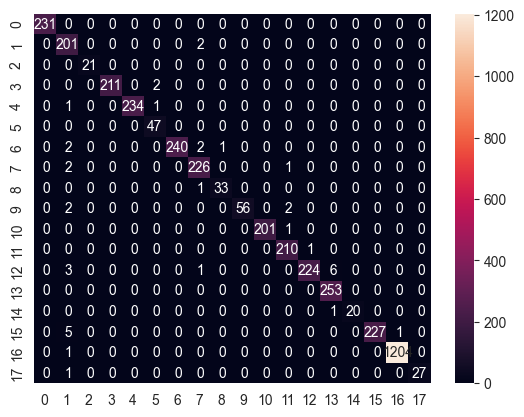

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['labels'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['labels'],pred_df['pred']), annot=True, fmt='2d')

                                               filepaths            labels  \
8323   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...       Banana_Good   
4204   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Lime_Bad   
16867  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
4413   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...          Lime_Bad   
12590  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
14868  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
12894  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
4928   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...        Orange_Bad   
2547   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...         Guava_Bad   
6524   C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...   Pomegranate_Bad   
16789  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...  Pomegranate_Good   
19321  C:\\Users\\ASUS\\Dropbox\\PC\\Desktop\\grid\\P...      Or

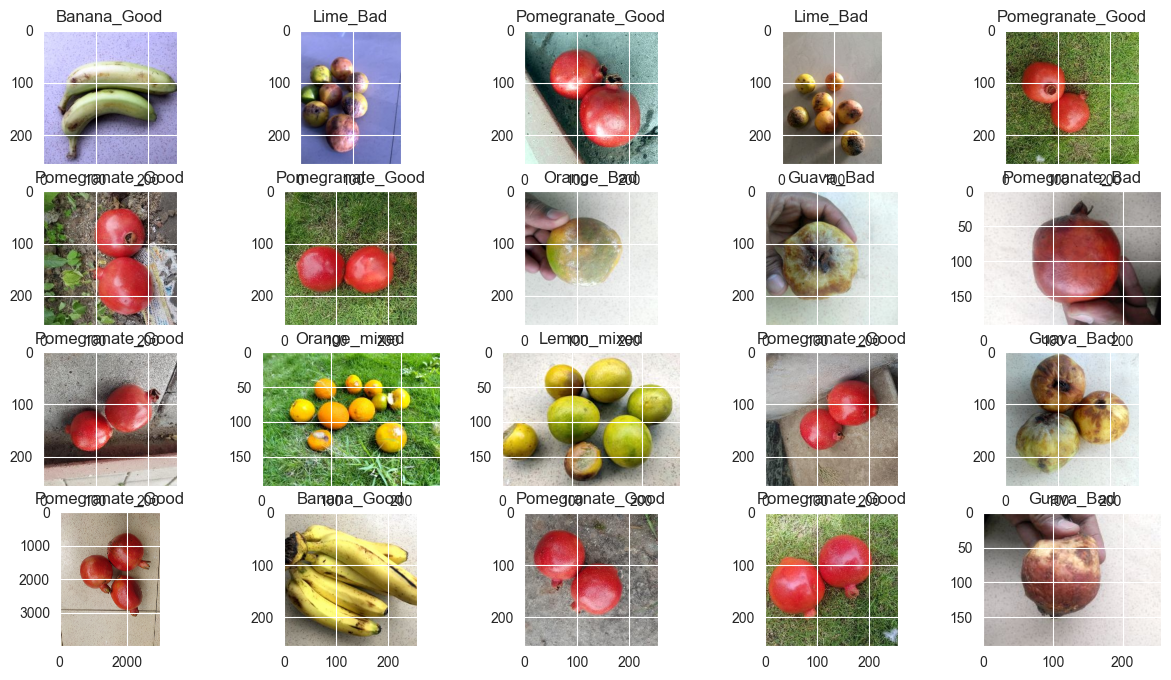

In [41]:
print(pred_df[pred_df['labels']==pred_df['pred']].head(20))
fig, ax=plt.subplots(nrows=4, ncols=5, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['labels']==pred_df['pred']].head(20).reset_index()
for i in range(0,20):
    ax[i].imshow(plt.imread(imlist['filepaths'][i]))
    ax[i].set_title(imlist['labels'][i])

In [43]:
model.save("model_fruitNet.keras")

In [44]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_fruitnet.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at 'C:\Users\ASUS\AppData\Local\Temp\tmpt6yf1_pk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 18), dtype=tf.float32, name=None)
Captures:
  1418917984416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919367728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919369312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919366848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919376352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919376528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919376704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919374064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919374240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1418919531216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14189

In [1]:
import cv2
import numpy as np
import tensorflow as tf

# Load the TFLite model (if using TensorFlow Lite)
interpreter = tf.lite.Interpreter(model_path="model_fruitnet.keras")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the target size for image (based on training input size)
IMG_SIZE = (256, 256)

# Open the webcam feed
cap = cv2.VideoCapture(0)

# Labels (class names) corresponding to the predictions
labels = {0: 'Bad Quality', 1: 'Good Quality', 2: 'Mixed Quality'}  # Example, adjust as per your data

def preprocess_frame(frame):
    # Resize frame to match the model's input size and preprocess
    resized_frame = cv2.resize(frame, IMG_SIZE)
    resized_frame = np.expand_dims(resized_frame, axis=0)  # Add batch dimension
    resized_frame = resized_frame.astype(np.float32) / 255.0  # Normalize
    return resized_frame

while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    if not ret:
        break

    # Preprocess the frame
    input_data = preprocess_frame(frame)
    
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    # Run inference
    interpreter.invoke()
    
    # Get the prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output_data)

    # Get label and confidence
    label = labels[predicted_class]
    confidence = output_data[0][predicted_class] * 100
    
    # Display the results on the frame
    cv2.putText(frame, f"Prediction: {label} ({confidence:.2f}%)", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Display the frame
    cv2.imshow('Fruit Quality Detector', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()


KeyError: 7

: 